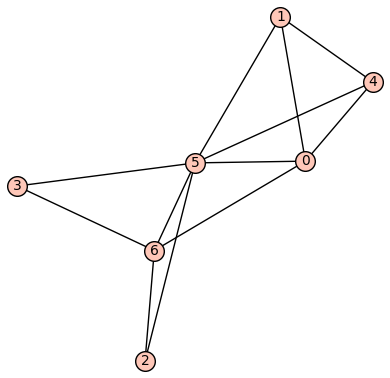

In [28]:
def randGraph():
    return graphs.RandomGNP(7,0.7)

G = randGraph()
G.show()

In [29]:
def randDico(G):
    dic = {}
    for i in G.vertices():
        dic[i] = randrange(1,10)
    return dic

dico = randDico(G)

In [30]:
def CS_PLNE(G,dico):
    S = []
    p = MixedIntegerLinearProgram(maximization=False)
    V = p.new_variable(integer=True, nonnegative=True)
    p.set_objective(sum(dico[v]*V[v] for v in G.vertices()))
    
    for i in G.vertices():
        p.add_constraint(V[i] <= 1)
    
    for j in G.edges():
            p.add_constraint((V[j[0]] + V[j[1]]) >= 1)
            
    opt = p.solve()
    
    for i in p.get_values(V):
        if p.get_values(V[i]) == 1:
            S.append(i)
        
    print(S)
        
          
CS_PLNE(G,dico)

[0, 1, 5, 6]


In [31]:
def Relax_CS_PLNE(G,dico):
    S = []
    p = MixedIntegerLinearProgram(maximization=False)
    V = p.new_variable(real=True, nonnegative=True)
    p.set_objective(sum(dico[v]*V[v] for v in G.vertices()))
    
    for i in G.vertices():
        p.add_constraint(V[i] <= 1)
    
    for j in G.edges():
            p.add_constraint((V[j[0]] + V[j[1]]) >= 1)
            
    opt = p.solve()
    
    for i in p.get_values(V):
        if p.get_values(V[i]) >= 0.5:
            S.append(i)
        
    print(S)
        
          
Relax_CS_PLNE(G,dico)

[0, 1, 4, 5, 6]


In [ ]:
def CS_greedy(G,dico):
    S = []
    listUsed = []
    listVertices = sort(G.vertices())
    while(listUsed =! listVertices):
        res = [null,0]
        for i in listVertices:
            var = len(G.neighbors(i)) / dico[i]
            if var > res[1]:
                res[1] = var
                res[0] = i
        S.append(res[0])
            